In [1]:
# Loading library
import pandas as pd
import numpy as np
import itertools

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

import xgboost as xgb
from ucimlrepo import fetch_ucirepo 

In [2]:
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=45)

original_df = concrete_compressive_strength.data.original

In [98]:
# def preproc(df):
#     df = original_df.copy()
#     df.loc[df[(df['num'] > 0)].index.tolist(),'num'] = 1

#     dropped_df = df.dropna()

#     X = dropped_df.drop('num', axis=1)
#     y = dropped_df['num']

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     X_train = X_train.reset_index()
#     X_test = X_test.reset_index()
#     y_train = y_train.reset_index()
#     y_test = y_test.reset_index()

#     return X_train, X_test, y_train, y_test

# Preliminary Experiment

## Complete Case

In [21]:
# def cv(X_train, y_train, md, fold):
    
#     param = {
#         "max_depth": md, 
#         "eta": 1, 
#         "objective": "binary:logistic"
#     }

#     dtrain = xgb.DMatrix(
#         data=X_train,
#         label=y_train
#     )
    
#     res = xgb.cv(
#         param,
#         dtrain,
#         num_boost_round=10,
#         nfold=fold,
#         metrics=("error"),
#         seed=42,
#         as_pandas = True

#     )

#     return res

In [96]:
# def evaluate_acc(model, X_test, y_test, md):

#     # Initialize a XGBoost model with tested parameters
#     model = xgb.XGBClassifier(
#         max_depth=md,
#         n_estimators=10,
#         eta=1,
#         random_state = 42
#     )
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     # Evaluate on the test set
#     precision = precision_score(y_test, y_pred)
#     recall    = recall_score(y_test, y_pred)
#     f1        = f1_score(y_test, y_pred)
#     accuracy  = accuracy_score(y_test, y_pred)

#     print(f'Accuracy: {accuracy * 100:.3f}%, Precision: {precision * 100:.3f}%, Recall: {recall * 100:.3f}%, F1: {f1 * 100:.3f}%')

#     return y_test, y_pred, accuracy, precision, recall, f1

## Random Forest -> importance scoring

In [100]:
# def get_dict(df):
#     names = df.columns.to_list()

#     names_dict = {}
#     for i, n in enumerate(df.columns.to_list()):
#         # print(f"index: {i}, name: {n}")
#         names_dict[n] = i
        
#     num_li = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
#     cat_li = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

#     num_dict = {n:names_dict[n] for n in num_li}
#     cat_dict = {c:names_dict[c] for c in cat_li}

#     return names, num_dict, cat_dict

In [49]:
# rf = RandomForestRegressor(n_estimators=20, max_depth=4)

In [ ]:
# scores = []

# for i in range(X.shape[1]):

#     # Select one feature at a time, do the cross validation
#     score = cross_val_score(rf, X.iloc[:, i:i+1],y, scoring="r2")

#     """
#     The function ShuffleSplit() randomly samples from the data
#     set for 10 times with the specified test set
#     """
#     # Split the training and test set at 7:3
#     cv = ShuffleSplit(n_splits=10, test_size=.3)
#     scores.append((abs(round(np.mean(score), 3)), names[i]))

# # Print out the sorted score of all features
# print(sorted(scores, reverse=True))

[(0.248, 'thal'), (0.233, 'cp'), (0.223, 'ca'), (0.16, 'exang'), (0.119, 'oldpeak'), (0.118, 'slope'), (0.104, 'thalach'), (0.083, 'trestbps'), (0.065, 'sex'), (0.041, 'age'), (0.038, 'chol'), (0.025, 'fbs'), (0.006, 'restecg')]


## CV

In [22]:
# result = cv(X_train, y_train, md=2, fold=5)
# print(result.to_latex(
#     caption='Cross Validation with parameter setting: max_depth=2, nfold=5', label='md2f5',
#     #float_format="{:.3f}".format,
# ))

\begin{table}
\caption{Cross Validation with parameter setting: max_depth=2, nfold=5}
\label{md2f5}
\begin{tabular}{lrrrr}
\toprule
 & train-error-mean & train-error-std & test-error-mean & test-error-std \\
\midrule
0 & 0.213116 & 0.015284 & 0.312500 & 0.073607 \\
1 & 0.154013 & 0.011774 & 0.253546 & 0.068211 \\
2 & 0.132938 & 0.020277 & 0.232181 & 0.048959 \\
3 & 0.117104 & 0.010386 & 0.240248 & 0.054846 \\
4 & 0.108688 & 0.027745 & 0.240248 & 0.068266 \\
5 & 0.090738 & 0.019343 & 0.261525 & 0.054085 \\
6 & 0.073851 & 0.014203 & 0.240337 & 0.065662 \\
7 & 0.069635 & 0.009193 & 0.253103 & 0.047619 \\
8 & 0.054871 & 0.008028 & 0.240337 & 0.065320 \\
9 & 0.047480 & 0.009478 & 0.240426 & 0.072062 \\
\bottomrule
\end{tabular}
\end{table}



In [23]:
# result = cv(X_train, y_train, md=2, fold=10)
# print(result.to_latex(
#     caption='Cross Validation with parameter setting: max_depth=2, nfold=10', 
#     label='md2f10',
#     #float_format="{:.3f}".format,
# ))

\begin{table}
\caption{Cross Validation with parameter setting: max_depth=2, nfold=10}
\label{md2f10}
\begin{tabular}{lrrrr}
\toprule
 & train-error-mean & train-error-std & test-error-mean & test-error-std \\
\midrule
0 & 0.217998 & 0.006554 & 0.290580 & 0.047986 \\
1 & 0.160340 & 0.009601 & 0.239493 & 0.088017 \\
2 & 0.141562 & 0.017076 & 0.223007 & 0.076283 \\
3 & 0.126572 & 0.013973 & 0.197283 & 0.104060 \\
4 & 0.110634 & 0.014944 & 0.201630 & 0.104973 \\
5 & 0.095641 & 0.014272 & 0.201630 & 0.105266 \\
6 & 0.090948 & 0.013113 & 0.188949 & 0.095844 \\
7 & 0.084371 & 0.011910 & 0.209964 & 0.091015 \\
8 & 0.072202 & 0.011553 & 0.184964 & 0.075213 \\
9 & 0.062825 & 0.013641 & 0.202174 & 0.069146 \\
\bottomrule
\end{tabular}
\end{table}



In [24]:
# result = cv(X_train, y_train, md=4, fold=5)
# print(result.to_latex(
#     caption='Cross Validation with parameter setting: max_depth=4, nfold=5', label='md4f5',
#     #float_format="{:.3f}".format,
# ))

\begin{table}
\caption{Cross Validation with parameter setting: max_depth=4, nfold=5}
\label{md4f5}
\begin{tabular}{lrrrr}
\toprule
 & train-error-mean & train-error-std & test-error-mean & test-error-std \\
\midrule
0 & 0.130833 & 0.021884 & 0.257801 & 0.069885 \\
1 & 0.080184 & 0.012320 & 0.262057 & 0.076424 \\
2 & 0.042211 & 0.008904 & 0.240869 & 0.055675 \\
3 & 0.025324 & 0.007034 & 0.223936 & 0.048623 \\
4 & 0.014759 & 0.009051 & 0.215160 & 0.048592 \\
5 & 0.004216 & 0.003940 & 0.240426 & 0.030605 \\
6 & 0.003163 & 0.002583 & 0.236170 & 0.035277 \\
7 & 0.004222 & 0.005170 & 0.240248 & 0.037127 \\
8 & 0.003163 & 0.002583 & 0.244415 & 0.049113 \\
9 & 0.000000 & 0.000000 & 0.232004 & 0.039318 \\
\bottomrule
\end{tabular}
\end{table}



In [25]:
# result = cv(X_train, y_train, md=4, fold=10)
# print(result.to_latex(
#     caption='Cross Validation with parameter setting: max_depth=2, nfold=5', label='md4f10',
#     #float_format="{:.3f}".format,
# ))

\begin{table}
\caption{Cross Validation with parameter setting: max_depth=2, nfold=5}
\label{md4f10}
\begin{tabular}{lrrrr}
\toprule
 & train-error-mean & train-error-std & test-error-mean & test-error-std \\
\midrule
0 & 0.131741 & 0.011004 & 0.252899 & 0.068775 \\
1 & 0.084858 & 0.010381 & 0.256522 & 0.096598 \\
2 & 0.054379 & 0.010053 & 0.248188 & 0.089339 \\
3 & 0.035161 & 0.007894 & 0.231884 & 0.077370 \\
4 & 0.022974 & 0.006785 & 0.232246 & 0.094362 \\
5 & 0.015013 & 0.009342 & 0.232065 & 0.075047 \\
6 & 0.008449 & 0.006230 & 0.236413 & 0.099977 \\
7 & 0.004693 & 0.004199 & 0.236413 & 0.111610 \\
8 & 0.001878 & 0.003114 & 0.240217 & 0.100804 \\
9 & 0.000939 & 0.001878 & 0.231884 & 0.115764 \\
\bottomrule
\end{tabular}
\end{table}



In [26]:
# result = cv(X_train, y_train, md=6, fold=5)
# print(result.to_latex(
#     caption='Cross Validation with parameter setting: max_depth=2, nfold=5', label='md6f5',
#     #float_format="{:.3f}".format,
# ))

\begin{table}
\caption{Cross Validation with parameter setting: max_depth=2, nfold=5}
\label{md6f5}
\begin{tabular}{lrrrr}
\toprule
 & train-error-mean & train-error-std & test-error-mean & test-error-std \\
\midrule
0 & 0.117093 & 0.018715 & 0.274557 & 0.067616 \\
1 & 0.065408 & 0.018750 & 0.270301 & 0.056772 \\
2 & 0.030593 & 0.011251 & 0.232181 & 0.052385 \\
3 & 0.024294 & 0.014454 & 0.240603 & 0.056202 \\
4 & 0.011607 & 0.006147 & 0.236259 & 0.040994 \\
5 & 0.006338 & 0.005186 & 0.236348 & 0.036808 \\
6 & 0.004222 & 0.002111 & 0.223493 & 0.048877 \\
7 & 0.004216 & 0.003940 & 0.219326 & 0.050913 \\
8 & 0.000000 & 0.000000 & 0.232004 & 0.042092 \\
9 & 0.000000 & 0.000000 & 0.236170 & 0.042633 \\
\bottomrule
\end{tabular}
\end{table}



In [27]:
# result = cv(X_train, y_train, md=6, fold=10)
# print(result.to_latex(
#     caption='Cross Validation with parameter setting: max_depth=2, nfold=5', label='md6f10',
#     #float_format="{:.3f}".format,
# ))

\begin{table}
\caption{Cross Validation with parameter setting: max_depth=2, nfold=5}
\label{md6f10}
\begin{tabular}{lrrrr}
\toprule
 & train-error-mean & train-error-std & test-error-mean & test-error-std \\
\midrule
0 & 0.120480 & 0.012341 & 0.274094 & 0.064601 \\
1 & 0.062814 & 0.008870 & 0.256884 & 0.076538 \\
2 & 0.037034 & 0.008994 & 0.257065 & 0.091630 \\
3 & 0.015941 & 0.007027 & 0.244203 & 0.084447 \\
4 & 0.009846 & 0.004426 & 0.244022 & 0.090126 \\
5 & 0.004693 & 0.004695 & 0.261413 & 0.086756 \\
6 & 0.001406 & 0.002148 & 0.236232 & 0.091478 \\
7 & 0.000937 & 0.001874 & 0.231884 & 0.105804 \\
8 & 0.000469 & 0.001408 & 0.219203 & 0.095001 \\
9 & 0.000937 & 0.001874 & 0.219022 & 0.090777 \\
\bottomrule
\end{tabular}
\end{table}



# Test set Evaluation

In [29]:
# base_y_test, base_y_pred, base_accuracy, base_precision, base_recall, base_f1 = evaluate_acc(X_test, y_test, 4)

Accuracy: 83.33%, Precision: 75.00%, Recall: 87.50%, F1: 80.77%


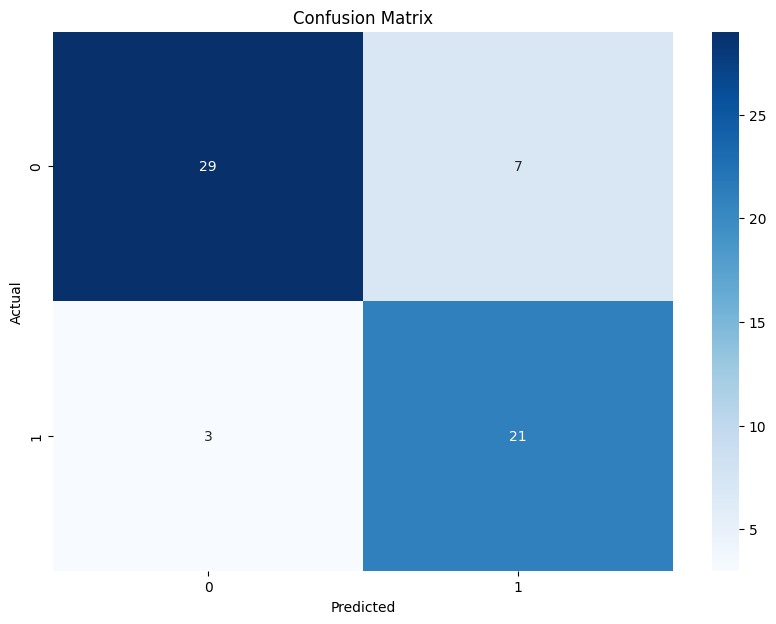

In [30]:
# cm = confusion_matrix(y_test, base_y_pred)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# Generating Missing values (Implementation)

The percentage of missing values goes from 10% to 50%. And missing values of all 3 kinds (Missing Completely At Random/Missing At Random/Missing Not At Randoma) are mixed.

The way of creating missing values are described in the following subsections.

## Define MCAR

In [12]:
# def generate_pair(length, width): # Input the length and width of the whole data frame
#     return (np.random.randint(0, length), np.random.randint(0, width)) # generate a pair of numbers, which is the location of the missing entry

In [67]:
# def insert_mcar(ratio, df): # Input the percentage of mcar, and the data frame

#     # Number of null values to insert
#     num_nulls = int(ratio * (df.size))

#     # Randomly choose positions to insert null values
#     idx_pair = []

#     for _ in range(num_nulls):
        
#         p = generate_pair(df.shape[0], df.shape[1])
#         while p in idx_pair: p = generate_pair(df.shape[0], df.shape[1])
#         idx_pair.append(p)
        
#         df.iat[p[0], p[1]] = np.nan
    
#     return df#, pd.isna(temp_df)


## Special Missingness

In the following work, we will call both MAR and MNAR the 'special missingness', as they provide much more information than MCAR and have not been fully explored. Meanwhile, 'target variable' refers to the column we chose to place artificial missing. The choice of target variable is worth investigating. On one hand, if we are removing something significantly contribute to the prediction of the outcome, which might lead to poor performance of the model. On the other hand, slight difference could be found if a relatively unrelated variable is chosen to be the target varialbe.

## Define MAR

Suppose column 1 and 2 are selected for generating MAR, and we want to remove some values in column 1 based on the values appear on column 2. There are infinite way of creating missing values. Here we would exclude the output column 'num' from candidate variable as missingness in response variable will not be fed into the predictive model.

Notice that we are handling a data set with mixed type of features (Integer/Categorical, all in form of number), and thus the choice of variable to be based on is vital. 

In this case, we are introducing MAR in column based on 'quantile' of integer variables.

To be specific, say we need 6 percent data MAR of the whole data set, and if the value in column 'age' of an entry is smaller than 6th quantile of column 'age', then we remove the value in column 'trestbps'.

Since the distribution of categorical variable determines the percentage of missing values, which means that it could not be adjusted for experimental purpose, we are not using any categorical variable.

In [68]:
# def insert_mar(ratio, df, dep_col, tar_col): 
    
#     """
#     Input:
#         - The percentage of data MAR to be generated
#         - The data frame
#         - Dependent column name: str
#         - Index of the target column to be inserted
#     """

#     # Get the index of entries to be remvoed
#     target_idx = df[dep_col] < df[dep_col].quantile(ratio)

#     # Remove the entries in the target column
#     df.iloc[target_idx, names_dict[tar_col]] = np.nan
    
#     return df

## Define MNAR

Values in a certain column could be removed based on the values themselves. Similarly, if greater than 30 percentage of all the other values in this column, then turn them into null. Or, we can simply set up a known probability for creating missing values, and it is hidden from the downstream task model as the information the missingness of MNAR is depending on should remian unobservable. The way we creat missing values is straightforward, however, it could be much more complex in real world data set. Complicated or domain-specific design of generating missing values for investigation could be further developed to approximate the true situation.

In [69]:
# def insert_mnar(ratio, df, tar_col): 

#     """
#     Input:
#         - The percentage of data MNAR to be generated
#         - The data frame
#         - Target column name: str
#         - Index of the target column to be inserted
#     """
    
#     # Get the index of entries to be remvoed
#     target_idx = df[tar_col] < df[tar_col].quantile(ratio)
    
#     # Remove the entries in the target column
#     df.iloc[target_idx, names_dict[tar_col]] = np.nan
    
#     return df

In [70]:
# def insert_null(dataframe, ratio_mcar, ratio_mar, ratio_mnar):
#     """
#         Input:
#             - The data frame to be inserted
#             - Ratios for each missing mechanism
#     """

#     temp_df = dataframe.copy()
    
#     # Example
#     mar_dep_col = "ca"
#     mar_tar_col = "thal"
#     temp_df = insert_mar(ratio_mcar, temp_df, mar_dep_col, mar_tar_col)

#     mnar_tar_col = "cp"
#     temp_df = insert_mnar(ratio_mnar, temp_df, mnar_tar_col)
    
#     temp_df = insert_mcar(ratio_mar, temp_df)
    
#     return temp_df

## Inserting Null values

We specify the total missing ratio and manually split it into 3 parts. Notice that due to the unpredictivity of MCAR, the actual missing ratio may be slightly lower than the expected percentage as there might be overlap.

In [17]:
# # total missing ratio = 0.1
# ratio_mcar, ratio_mar, ratio_mnar = 1/30, 1/30, 1/30
# missing_df = insert_null(df, ratio_mcar, ratio_mar, ratio_mnar)

In [18]:
# print(pd.isna(missing_df).sum().sum())

147


# Imputation

We start with the feature with least missing entries. And use the feature as target, and others as predictors. This method follows a strategy that consider each variable with missing values as the outcome and utilize the other complete column (filled with by the mean of respective columns for continuous and most frequent data for categorical type of data)

In [94]:
# def impute(missing_df):
    
#     missing_reg_df = missing_df.copy()
#     missing_reg_df_nan_count = missing_reg_df.isnull().sum()

#     sort_index_li = np.argsort(missing_reg_df_nan_count).tolist()

#     for i in sort_index_li:

#         temp_df = missing_reg_df

#         target = temp_df.iloc[:, i] # Get the target column

#         temp_df = temp_df.iloc[:, temp_df.columns != i] # Kick it out of the data frame

#         if target.name in num_li:
#             temp_df_imputed = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(temp_df) # Fill by respective mean
#         elif target.name in cat_li:
#             temp_df_imputed = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(temp_df) # Fill by respective mode
        
#         # Select out the training set
#         y_train = target[target.notnull()]
#         x_train = temp_df_imputed[y_train.index, :]

#         # Select out the test set
#         y_test = target[target.isnull()]
#         x_test = temp_df_imputed[y_test.index, :]

#         model = RandomForestRegressor()
#         model.fit(x_train, y_train)
#         y_predict = model.predict(x_test)

#         missing_reg_df.iloc[missing_reg_df.iloc[:, i].isnull(), i] = y_predict

#     return missing_reg_df
    

# Experiment

In [53]:
class test():
    def __init__(self, df):

        self.df = df

        self.performance, self.test_performance = None, None

        self.ratio_list = [1/15, 1/10, 1/5]
        mechans = ["MNAR", "MCAR", "MAR"]
        self.metrics = ["accuracy", "precision", "recall", "f1"]
        
        self.mechan = "Default"

        self.mar_dep_col, self.mar_tar_col, self.mnar_tar_col = "ca", "thal", "cp"
        self.ratio_dict = {"ratio_mcar": 1/30, "ratio_mar": 1/30, "ratio_mnar": 1/30}
        
        self.mul_idx = pd.MultiIndex.from_product(
            [mechans, [f"{r:.3f}" for r in self.ratio_list]],
             names=["mechans", "ratios"]
        )

        # Baseline Performance
        print("Initializing... (Mechan: Default)")
        self.get_dict()
        self.preproc()
        self.baseperformance()
        self.insert_null() # Create missing values first
        self.impute() # Impute the generated missing data frame
        self.cv_eval()
        self.test_eval()
        print("Done")
    
    def preproc(self):
        df = self.df.copy()
        df.loc[df[(df['num'] > 0)].index.tolist(),'num'] = 1

        dropped_df = df.dropna().astype(np.float64)
        num_cols = dropped_df[self.num_li]
        num_cols = (num_cols - num_cols.min()) / (num_cols.max() - num_cols.min())
        dropped_df.loc[:, self.num_li] = num_cols
        # print(type(num_cols.iloc[0,0]))
        self.dropped_df = dropped_df

        X = self.dropped_df.drop('num', axis=1)
        y = self.dropped_df['num']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                            random_state=42)

        self.X_train = X_train.reset_index(drop=True)
        self.X_test = X_test.reset_index(drop=True)
        self.y_train = y_train.reset_index(drop=True)
        self.y_test = y_test.reset_index(drop=True)

    def get_dict(self):
        df = self.df.iloc[:,:-1]
        self.names = df.columns.to_list()

        self.names_dict = {}
        for i, n in enumerate(df.columns.to_list()): self.names_dict[n] = i
            
        self.num_li = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
        self.cat_li = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

        self.num_dict = {n:self.names_dict[n] for n in self.num_li}
        self.cat_dict = {c:self.names_dict[c] for c in self.cat_li}

    def baseperformance(self, md=4, fold=10):
        self.clf = xgb.XGBClassifier(max_depth=md)
        
        scores = cross_validate(self.clf, self.X_train,
                                 self.y_train, cv=fold, 
                                 scoring=self.metrics)
        
        score_frame = pd.DataFrame(scores).iloc[:,2:]
        avg_performance = score_frame.mean()

        # print(pd.concat([score_frame, pd.DataFrame(avg_performance, columns=score_frame.columns)]))#, ignore_index=True))
        print(f"Score frame: \n{score_frame}")
        print(f"Mean of score frame: \n{avg_performance}")

        self.clf.fit(self.X_train, self.y_train)

        y_pred = self.clf.predict(self.X_test)

        # Evaluate on the test set
        accuracy  = accuracy_score(self.y_test, y_pred)
        precision = precision_score(self.y_test, y_pred)
        recall    = recall_score(self.y_test, y_pred)
        f1        = f1_score(self.y_test, y_pred)

        print(f"Baseline performance: Accurarcy: {accuracy * 100: .2f}%, Precision: {precision * 100: .2f}%, Recall: {recall * 100: .2f}%, F1: {f1 * 100: .2f}%.")


    def insert_mcar(self, ratio, df): # Input the percentage of mcar, and the data frame
        
        # Input the length and width of the whole data frame
        def generate_pair(length, width): 
            # generate a pair of numbers, which is the location of the missing entry
            return (np.random.randint(0, length), np.random.randint(0, width)) 
        
        # Number of null values to insert
        num_nulls = int(ratio * (df.size))

        # Randomly choose positions to insert null values
        idx_pair = []

        for _ in range(num_nulls):
            
            p = generate_pair(df.shape[0], df.shape[1])
            while p in idx_pair: p = generate_pair(df.shape[0], df.shape[1])
            idx_pair.append(p)
            
            df.iat[p[0], p[1]] = np.nan
        
        return df
    
    def insert_mar(self, ratio, df, dep_col, tar_col): 
        
        """
        Input:
            - The percentage of data MAR to be generated
            - The data frame
            - Dependent column name: str
            - Index of the target column to be inserted
        """

        # Get the index of entries to be remvoed
        target_idx = df[dep_col] < df[dep_col].quantile(ratio)

        # Remove the entries in the target column
        df.iloc[target_idx, self.names_dict[tar_col]] = np.nan
        
        return df

    def insert_mnar(self, ratio, df, tar_col): 

        """
        Input:
            - The percentage of data MNAR to be generated
            - The data frame
            - Target column name: str
            - Index of the target column to be inserted
        """
        
        # Get the index of entries to be remvoed
        target_idx = df[tar_col] < df[tar_col].quantile(ratio)
        
        # Remove the entries in the target column
        df.iloc[target_idx, self.names_dict[tar_col]] = np.nan
        
        return df

    def insert_null(self):
        """
            Input:
                - The data frame to be inserted
                - Ratios for each missing mechanism
        """
        # self.mechan = mechan if mechan is not None else None
        missing_df = self.X_train.copy()

        # Example
        missing_df = self.insert_mar(self.ratio_dict["ratio_mcar"], missing_df, self.mar_dep_col, self.mar_tar_col)
        missing_df = self.insert_mnar(self.ratio_dict["ratio_mnar"], missing_df, self.mnar_tar_col)
        self.missing_df = self.insert_mcar(self.ratio_dict["ratio_mar"], missing_df)

    def cv(self, md, fold):
    
        param = {
            "max_depth": md, 
            "eta": 1, 
            "objective": "binary:logistic"
        }

        dtrain = xgb.DMatrix(
            data=self.X_train,
            label=self.y_train
        )
        
        res = xgb.cv(
            param,
            dtrain,
            num_boost_round=10,
            nfold=fold,
            metrics=("error"),
            seed=42,
            as_pandas = True
        )

        return res

    def impute(self):
    
        self.imputed_df = self.missing_df.copy()
        
        missing_df_nan_count = self.missing_df.isnull().sum()

        sort_index_li = np.argsort(missing_df_nan_count).tolist()

        # for i in tqdm(sort_index_li, desc=f"Imputing with MNAR ratio: {self.ratio_dict['ratio_mnar']:.3f}, MAR ratio: {self.ratio_dict['ratio_mar']:.3f}, MCAR ratio: {self.ratio_dict['ratio_mcar']:.3f}"):
        for i in sort_index_li:
            temp_df = self.imputed_df.copy()

            target = temp_df.iloc[:, i] # Get the target column

            temp_df = temp_df.iloc[:, temp_df.columns != i] # Kick it out of the data frame

            if target.name in self.num_li:
                self.num_li.remove(target.name)
                temp_df[self.num_li] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(temp_df[self.num_li]) # Fill by respective mean
                temp_df_imputed = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(temp_df) # Fill by respective mode
                self.num_li.append(target.name)
            elif target.name in self.cat_li:
                self.cat_li.remove(target.name)
                temp_df[self.cat_li] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(temp_df[self.cat_li])
                temp_df_imputed = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(temp_df)
                self.cat_li.append(target.name)

            # Select out the training set
            y_train = target[target.notnull()]
            x_train = temp_df_imputed[y_train.index, :]

            # Select out the test set
            y_test = target[target.isnull()]
            x_test = temp_df_imputed[y_test.index, :]

            self.imputer = RandomForestRegressor()
            self.imputer.fit(x_train, y_train)
            y_predict = self.imputer.predict(x_test)

            self.imputed_df.iloc[y_test.index, i] = y_predict

    
    def cv_eval(self, ratio=0, md=4, fold=10):

        self.clf = xgb.XGBClassifier(max_depth=md)
        scores = cross_validate(self.clf, self.imputed_df,
                                 self.y_train, cv=fold,
                                 scoring=self.metrics)
        
        score_frame = pd.DataFrame(scores).iloc[:,2:]
        self.avg_performance = score_frame.mean()

        if self.performance is None and ratio==0:
            self.performance = pd.DataFrame(np.nan, index=self.mul_idx, columns=[f'avg_cv_{m}' for m in self.metrics])
            base_performance = pd.DataFrame({f'avg_cv_{m}':self.avg_performance[f'test_{m}'] for m in self.metrics}, index=[("DEFAULT", f"all {1/30:.3f}")])
            self.performance = pd.concat([self.performance, base_performance])                                
        elif self.performance is not None and self.mechan is not None and ratio != 0:
            for m in self.metrics:
                self.performance.loc[pd.Index([(self.mechan, f"{ratio:.3f}")]), f'avg_cv_{m}'] = self.avg_performance[f'test_{m}']

    def test_eval(self, ratio=0):
        
        self.clf.fit(self.imputed_df, self.y_train)
        y_pred = self.clf.predict(self.X_test)

        # Evaluate on the test set
        accuracy  = accuracy_score(self.y_test, y_pred)
        precision = precision_score(self.y_test, y_pred)
        recall    = recall_score(self.y_test, y_pred)
        f1        = f1_score(self.y_test, y_pred)

        # self.test_index = pd.Index([(f"MNAR ratio: {self.ratio_dict['ratio_mnar']:.3f}, MAR ratio: {self.ratio_dict['ratio_mar']:.3f}, MCAR ratio: {self.ratio_dict['ratio_mcar']:.3f}")])
        values = np.array([accuracy, precision, recall, f1])#.reshape(1,4)

        if self.test_performance is None:
            self.test_performance = pd.DataFrame(np.nan, index=self.mul_idx, columns=[f'test_{m}' for m in self.metrics])
            base_performance = pd.DataFrame({f'test_{m}':v for m, v in zip(self.metrics, values)}, index=[("DEFAULT", f"all {1/30:.3f}")])
            self.test_performance = pd.concat([self.test_performance, base_performance])
        else:
            self.test_performance.loc[pd.Index([(self.mechan, f"{ratio:.3f}")])] = values
    
    def forward(self, mechan):

        self.mechan = mechan
        
        # for r in tqdm(self.ratio_list, desc=f"Evaluating with {self.mechan}"):
        for r in self.ratio_list:

            if self.mechan == "MNAR":
                self.ratio_dict["ratio_mnar"] = r
            elif self.mechan == "MAR":
                self.ratio_dict["ratio_mar"] = r
            elif self.mechan == "MCAR":
                self.ratio_dict["ratio_mcar"] = r

            self.insert_null() # Create missing values first
            self.impute() # Impute the generated missing data frame
            self.cv_eval(r)
        
            # print(f"Testing...\n(mechan: {self.mechan}, ratio_mnar: {self.ratio_dict["ratio_mnar"]:.3f}, ratio_mar: {self.ratio_dict["ratio_mar"]:.3f}, ratio_mcar: {self.ratio_dict["ratio_mcar"]:.3f})")
            self.test_eval(r) # Evaluate the model performance on test set
            self.reset_ratio()
        
    def reset_ratio(self):
        self.ratio_dict["ratio_mnar"] = 1/30
        self.ratio_dict["ratio_mar"] = 1/30
        self.ratio_dict["ratio_mcar"] = 1/30

    def forward_(self, mar_dep_col="ca", mar_tar_col="thal", mnar_tar_col="cp"):

        self.mar_dep_col, self.mar_tar_col, self.mnar_tar_col = mar_dep_col, mar_tar_col, mnar_tar_col
        print(f"Given mar_dep_col: {self.mar_dep_col}, mar_tar_col: {self.mar_tar_col}, mnar_tar_col: {self.mnar_tar_col}")

        # Evaluate the model performance on training set using CV
        
        # Start from MNAR
        self.forward(mechan="MNAR")

        # Then MCAR
        self.forward(mechan="MCAR")

        # Finally MAR
        self.forward(mechan="MAR")
        
        # self.performance.columns = [f'avg_cv_{m}' for m in self.metrics]
        # print(self.performance)
        # print(self.test_performance)

    def res_format(self, df, caption, label):

            s = df.style
            
            s = s.highlight_max(
                props='bfseries:;'
            ).format_index(escape="latex", axis=1).set_table_styles([{'selector': 'caption','props': 'caption-side: bottom;'}], overwrite=False)

            res = s.to_latex( 
                multirow_align="c",
                position_float="centering",
                clines="skip-last;data",
                hrules=True,
                ).replace(
                '\\end{tabular}',
                '\\end{tabular}\n' + '\\caption{' + f'{caption}' + '}\n\\label{' + f'{label}' + '}')
            
            print("".join(res.split("'")))

    def auto_forward(self, var1="ca", var2="thal", var3="cp"):

        vars = [var1, var2, var3]
        iters = itertools.permutations(vars, 3)

        for subset in tqdm(iters):
            try:
                self.forward_(subset[0], subset[1], subset[2])

                print("Setting shown as follows:\n Data MAR: \\texttt{" + f"{self.mar_dep_col}"  + "} determines \\texttt{" + f"{self.mar_tar_col}"  + "} \& Variable MNAR: \\texttt{" + f"{self.mnar_tar_col}" \
                + "}.\nTraining performance: See table \\ref{" + f'trainpef_{self.mar_dep_col}_{self.mar_tar_col}_{self.mnar_tar_col}'\
                + "}.\nTest performance: See table \\ref{" + f'testpef_{self.mar_dep_col}_{self.mar_tar_col}_{self.mnar_tar_col}' + "}.\n")

                self.res_format(self.performance, "Training Performance of setting: MAR (\\texttt{" + f"{self.mar_dep_col}"\
                                + "} determines \\texttt{" + f"{self.mar_tar_col}"  + "}), \\texttt{" + f"{self.mnar_tar_col}"\
                                + "} MNAR", f'trainpef_{self.mar_dep_col}_{self.mar_tar_col}_{self.mnar_tar_col}')
                
                self.res_format(self.test_performance, "Test Performance of setting: MAR (\\texttt{" + f"{self.mar_dep_col}"\
                                + "} determines \\texttt{" + f"{self.mar_tar_col}"  + "}), \\texttt{" + f"{self.mnar_tar_col}"\
                                + "} MNAR", f'testpef_{self.mar_dep_col}_{self.mar_tar_col}_{self.mnar_tar_col}')
            except ValueError:
                print("Something unusual happen. Please rerun.")

In [54]:
zhx = test(original_df)

Initializing... (Mechan: Default)
Score frame: 
   test_accuracy  test_precision  test_recall   test_f1
0       0.833333        1.000000     0.636364  0.777778
1       0.791667        0.800000     0.727273  0.761905
2       0.791667        0.750000     0.818182  0.782609
3       0.875000        0.833333     0.909091  0.869565
4       0.791667        0.769231     0.833333  0.800000
5       0.875000        0.909091     0.833333  0.869565
6       0.666667        0.700000     0.583333  0.636364
7       0.782609        0.750000     0.818182  0.782609
8       0.869565        0.785714     1.000000  0.880000
9       0.782609        1.000000     0.545455  0.705882
Mean of score frame: 
test_accuracy     0.805978
test_precision    0.829737
test_recall       0.770455
test_f1           0.786628
dtype: float64
Baseline performance: Accurarcy:  85.00%, Precision:  77.78%, Recall:  87.50%, F1:  82.35%.
Done


In [29]:
zhx.dropped_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.0,0.481132,0.244292,1.0,2.0,0.603053,0.0,0.370968,3.0,0.000000,6.0,0.0
1,0.791667,1.0,4.0,0.622642,0.365297,0.0,2.0,0.282443,1.0,0.241935,2.0,1.000000,3.0,1.0
2,0.791667,1.0,4.0,0.245283,0.235160,0.0,2.0,0.442748,1.0,0.419355,2.0,0.666667,7.0,1.0
3,0.166667,1.0,3.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,3.0,0.000000,3.0,0.0
4,0.250000,0.0,2.0,0.339623,0.178082,0.0,2.0,0.770992,0.0,0.225806,1.0,0.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.583333,0.0,4.0,0.433962,0.262557,0.0,0.0,0.396947,1.0,0.032258,2.0,0.000000,7.0,1.0
298,0.333333,1.0,1.0,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,2.0,0.000000,7.0,1.0
299,0.812500,1.0,4.0,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,2.0,0.666667,7.0,1.0
300,0.583333,1.0,4.0,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,2.0,0.333333,7.0,1.0


In [231]:
zhx.auto_forward('ca', 'thal', 'age')

0it [00:00, ?it/s]

Given mar_dep_col: ca, mar_tar_col: thal, mnar_tar_col: age
Setting shown as follows:
 Data MAR: \texttt{ca} determines \texttt{thal} \& Variable MNAR: \texttt{age}.
Training performance: See table \ref{trainpef_ca_thal_age}.
Test performance: See table \ref{testpef_ca_thal_age}.

\begin{table}
\centering
\begin{tabular}{llrrrr}
\toprule
 &  & avg\_cv\_accuracy & avg\_cv\_precision & avg\_cv\_recall & avg\_cv\_f1 \\
\midrule
\multirow[c]{3}{*}{MNAR} & 0.067 & 0.801812 & 0.800004 & 0.778788 & \bfseries 0.787596 \\
 & 0.100 & 0.793116 & 0.778013 & \bfseries 0.796970 & 0.783915 \\
 & 0.200 & 0.785145 & 0.796851 & 0.743939 & 0.760310 \\
\cline{1-6}
\multirow[c]{3}{*}{MCAR} & 0.067 & 0.784239 & 0.791492 & 0.750000 & 0.760028 \\
 & 0.100 & 0.779891 & 0.814246 & 0.717424 & 0.755285 \\
 & 0.200 & \bfseries 0.809601 & \bfseries 0.823898 & 0.777273 & 0.786702 \\
\cline{1-6}
\multirow[c]{3}{*}{MAR} & 0.067 & 0.801087 & 0.808953 & 0.777273 & 0.786886 \\
 & 0.100 & 0.738406 & 0.734251 & 0.725758 & 